In [1]:
%matplotlib inline
from nansat import *

In [2]:
# open dataset and crop
n = Nansat('http://www.ifremer.fr/opendap/cerdap1/globcurrent/v2.0/global_012_deg/geostrophic/2014/231/20140819000000-GLOBCURRENT-L4-CURgeo_0m-ALT_OI-v02.0-fv01.0.nc')
n.crop_lonlat([26, 32], [-40, -32])

/home/vagrant/miniconda/lib/python2.7/site-packages/nansat/mappers/opendap.py:89: UserWarning: Time consuming loading time from OpenDAP...
  warnings.warn('Time consuming loading time from OpenDAP...')
/home/vagrant/miniconda/lib/python2.7/site-packages/nansat/mappers/opendap.py:91: UserWarning: Loading time - OK!
  warnings.warn('Loading time - OK!')


(1648, 320, 48, 64)

In [3]:
# fetch U,V and lon,lat
u = n['eastward_geostrophic_current_velocity']
v = n['northward_geostrophic_current_velocity']
lon, lat = n.get_geolocation_grids()

In [4]:
# get increment of U,V in x,y directions
R = 6371.000
du_dx = np.diff(u, axis=1)[:-1, :]
dv_dx = np.diff(v, axis=1)[:-1, :]
du_dy = np.diff(u, axis=0)[:, :-1]
dv_dy = np.diff(v, axis=0)[:, :-1]

# get increment of X,Y (km) in x,y directions
dlon_dx = np.radians(np.diff(lon, axis=1))[:-1, :]
dlat_dx = np.radians(np.diff(lat, axis=1))[:-1, :]
dlon_dy = np.radians(np.diff(lon, axis=0))[:, :-1]
dlat_dy = np.radians(np.diff(lat, axis=0))[:, :-1]

dx_dx = dlon_dx * np.cos(np.radians(lat[:-1, :-1])) * R
dy_dx = dlat_dx * R
dx_dy = dlon_dy * np.cos(np.radians(lat[:-1, :-1])) * R
dy_dy = dlat_dy * R

#plt.imshow(dx_dx);plt.colorbar();plt.show()
#plt.imshow(dy_dx);plt.colorbar();plt.show()
#plt.imshow(dx_dy);plt.colorbar();plt.show()
#plt.imshow(dy_dy);plt.colorbar();plt.show()

In [5]:
# calculate vorticity
vort = dv_dx / dx_dx - du_dy / dy_dy

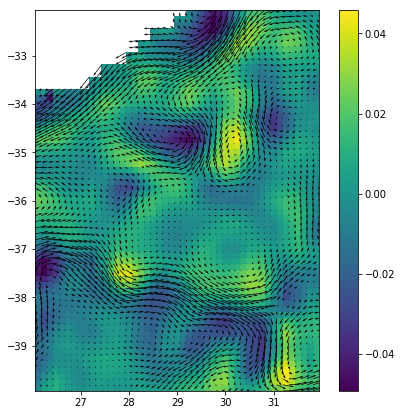

In [6]:
# plot
plt.figure(figsize=(7,7))
plt.imshow(vort, origin='lower',
           extent=[lon.min(), lon.max(), lat.min(), lat.max()],
          interpolation='nearest')
plt.colorbar()
stp = 1
plt.quiver(lon[::stp, ::stp], lat[::stp, ::stp], u[::stp, ::stp], v[::stp, ::stp], scale=20)
